# Oficina 5 - Analisando dataset de veículos

## 0.0 - Importações

### 0.1 - Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 0.2 - Importando dataset

In [2]:
df = sns.load_dataset('mpg')

## 1.0 Análises 

### 1.1 - Análise informativa

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


### 1.2 - Análise Descritiva

In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


#### 1.2.4 - Visualizações e Questionamentos

**Vamos investigar a relação entre autonomia e aceleração nos três países**

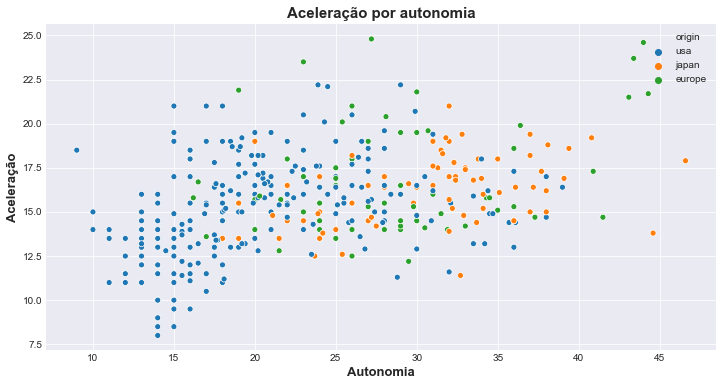

In [320]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='mpg', y = 'acceleration', hue='origin',   data=df)
plt.title('Aceleração por autonomia', fontsize=15, fontweight='bold')
plt.xlabel('Autonomia', fontsize=13, fontweight='bold')
plt.ylabel('Aceleração', fontsize=13, fontweight='bold')
plt.show()

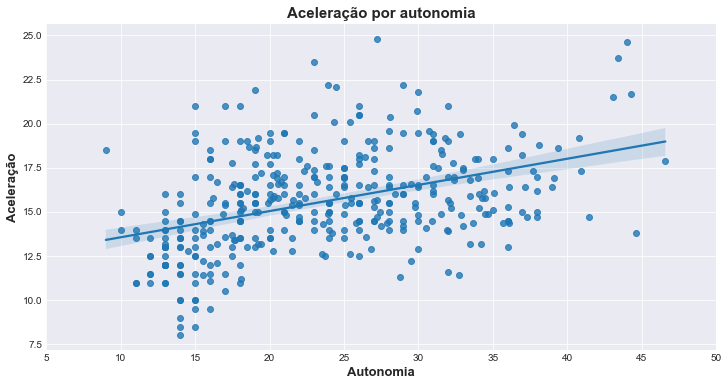

In [327]:
plt.figure(figsize=(12,6))

plt.style.use('seaborn-darkgrid')

a = sns.regplot(x='mpg', y = 'acceleration', data=df)

a.set(xlim=(5,50)) # delimitando eixo das abscissas no intervalo [5,50] - Gráfico tava cortando pontos

#  Definindo nomenclatura do título e eixos
plt.title('Aceleração por autonomia', fontsize=15, fontweight='bold')
plt.xlabel('Autonomia', fontsize=13, fontweight='bold')
plt.ylabel('Aceleração', fontsize=13, fontweight='bold')

plt.show()

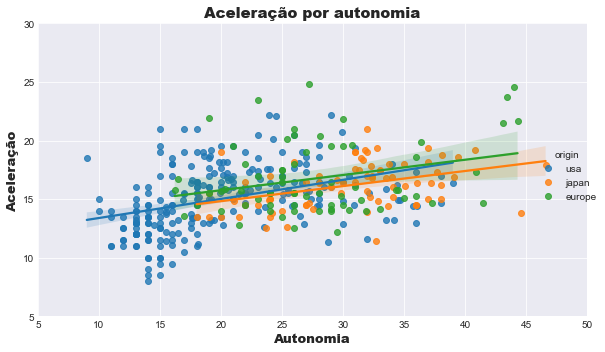

In [333]:

a = sns.lmplot(x='mpg', y = 'acceleration',  hue='origin',  height=5, aspect=1.5, fit_reg=True, data=df)

plt.style.use('seaborn-darkgrid')

a.set(ylim=(5,30), xlim=(5,50))

plt.title('Aceleração por autonomia', fontsize=15, fontweight='black')

a.set_ylabels('Aceleração', fontsize=13, fontweight='black')
a.set_xlabels('Autonomia', fontsize=13, fontweight='black')

# Permite com que todos os elementos no gráfico se encaixem dentro da parte de visualização
# Evita sobreposição dos elementos da visualização. Bom para evitar a sobreposição da legenda
# Perceba que sem ele, a legende fica do lado de fora da visualização
a.fig.tight_layout() 

plt.show()

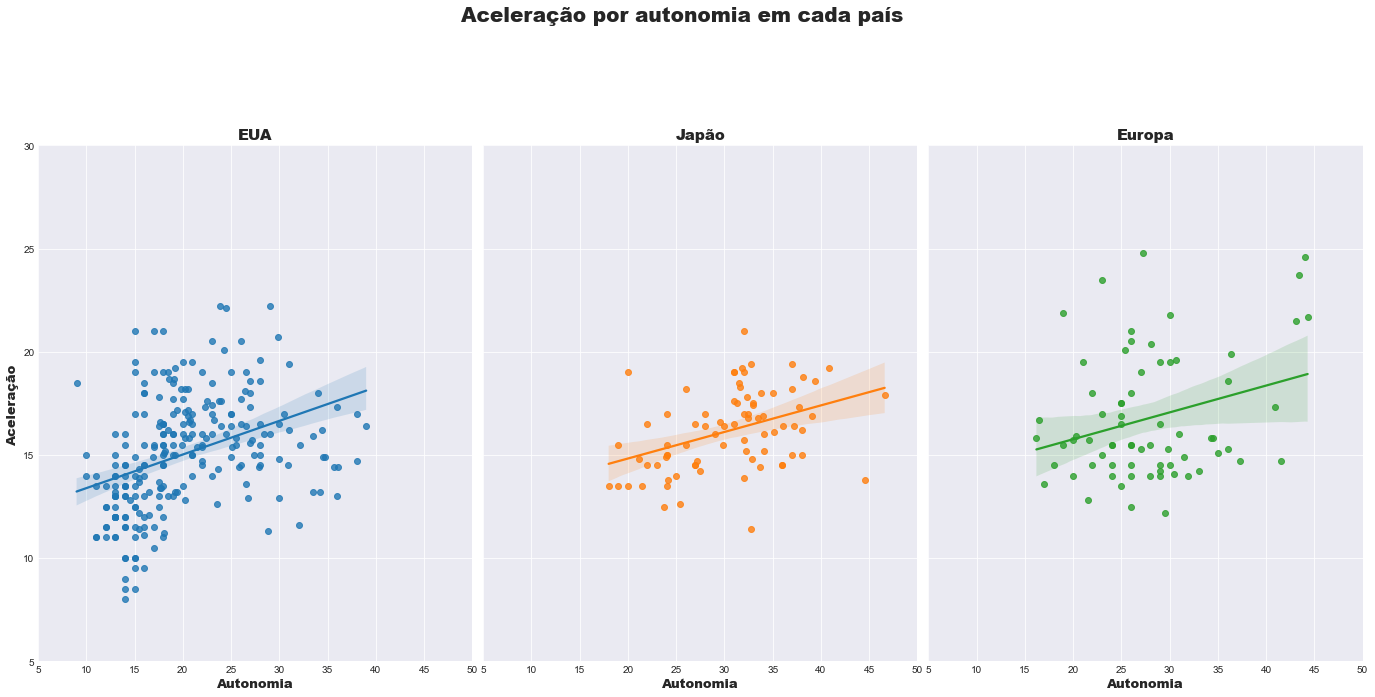

In [330]:
# Geramos o gráfico e depois atribuimos a uma variável para modificação a posterior
# Em height definimos a escala de altura em polegadas
# aspect, define a proporção da face. O resultado é a largura = aspect*altura
# Em fit_reg, mantemos o valor padrão True, optando por continuar com a reta de regressão
a = sns.lmplot(x='mpg', y = 'acceleration', col='origin', hue='origin', height=8, aspect=0.8, fit_reg=True  ,  data=df)

plt.style.use('seaborn-dark')

# Setamos aqui o limite dos eixos. Foi necessário pois o padrão definido estava cortando os dados
a.set(ylim=(5,30), xlim=(5,50))

# Definimos o título principal como título geral da visualização
# Observe que colocamos as coordenadas x e y . Foi necessário definir assim pois estava sobrepondo o "japão"
a.fig.suptitle('Aceleração por autonomia em cada país', x = 0.5, y=1.2, size=20, fontweight='black')

# Usamos uma propriedade do FaceGrid para modificar o título de cada visualização em grade
for i, origin in enumerate(['EUA', 'Japão', 'Europa']):
    a.axes[0,i].set_title(origin, size=15, fontweight='black')

# Definimos os títulos dos eixos
a.set_xlabels(label='Autonomia', size=13 ,fontweight='black')
a.set_ylabels(label='Aceleração', size=13 , fontweight='black')

# Exibimos a visualização
plt.show()

In [334]:
# Analisando correlação pelo número real
df['mpg'].corr(df['acceleration'])

0.42028891210165065

**Análise**

Há uma baixa correlação positiva em todas as análises feitas acima. Isso significa que o os valores de aceleração e autonomia tendem a crescer conforme o aumento de um ou de outro, mas que essa relação tem uma certa "resistência" como um comportamento geral de todos os dados, tanto que é possível perceber uma maior dispersão dos dados em praticamente todos os países em torno da reta que tenta modelar o comportamento dos dados, indicando que a relação entre a aceleração e autonomia não é tão forte ou não é muito dependente em um contexto mais amplo.

Também é possível perceber que a taxa de crescimento da aceleração em relação a autonomia(mpg) é muito similar, de acordo com a reta de regressão que envolvem o comportamento dos dados em todos os países. Isso significa que há uma similaridade de crescimento da aceleração em relação ao crescimento da autonomia em veiculos dos três países.


---

**Vamos analisar a relação entre aceleração e autonomia por ano do modelo**

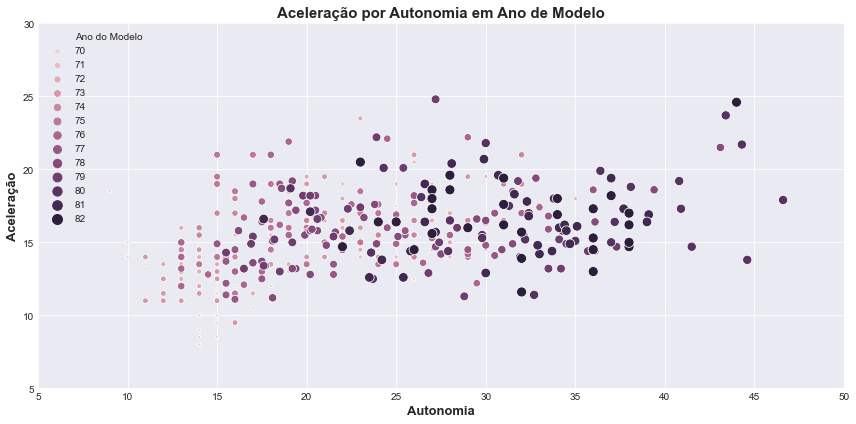

In [504]:
plt.figure(figsize=(12,6))
a = sns.scatterplot(x='mpg', y = 'acceleration', hue='model_year', legend='full', size='model_year', sizes=(10,100), data=df)
a.set(ylim=(5,30), xlim=(5,50))

# Caracterizando o gráfico
plt.title('Aceleração por Autonomia em Ano de Modelo', fontsize=15, fontweight='bold')
plt.xlabel('Autonomia', fontsize=13, fontweight='bold')
plt.ylabel('Aceleração', fontsize=13, fontweight='bold')
a.legend().texts[0].set_text('Ano do Modelo') # modificando o título da legenda
plt.tight_layout()

# Permitindo visualização
plt.show()

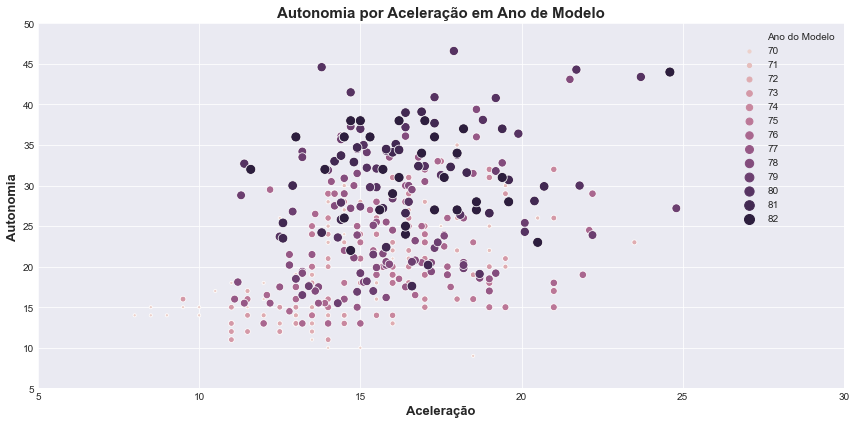

In [505]:
plt.figure(figsize=(12,6))
a = sns.scatterplot(y='mpg', x = 'acceleration', hue='model_year', legend='full', size='model_year', sizes=(10,100), data=df)
a.set(xlim=(5,30), ylim=(5,50))

# Caracterizando o gráfico
plt.title('Autonomia por Aceleração em Ano de Modelo', fontsize=15, fontweight='bold')
plt.ylabel('Autonomia', fontsize=13, fontweight='bold')
plt.xlabel('Aceleração', fontsize=13, fontweight='bold')
a.legend().texts[0].set_text('Ano do Modelo') # modificando o título da legenda
plt.tight_layout()

# Permitindo visualização
plt.show()

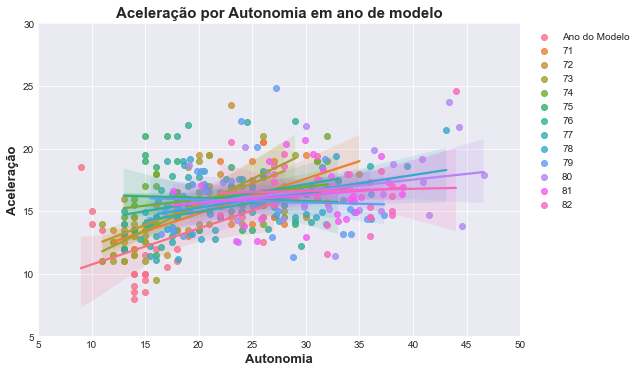

In [481]:

a = sns.lmplot(x='mpg', y = 'acceleration', hue='model_year', height=5, aspect=1.5,  legend=False, data=df)
a.set(ylim=(5,30), xlim=(5,50))

# Caracterizando o gráfico
plt.title('Aceleração por Autonomia em Ano de Modelo', fontsize=15, fontweight='bold')
plt.xlabel('Autonomia', fontsize=13, fontweight='bold')
plt.ylabel('Aceleração', fontsize=13, fontweight='bold')
a.ax.legend(bbox_to_anchor=(1.01, 1)).texts[0].set_text('Ano do Modelo') # modificando o título da legenda


# Permitindo visualização
plt.show()

In [499]:
df['model_year'].corr(df['mpg'])

0.5792671330833097

In [500]:
df['model_year'].corr(df['acceleration'])

0.2881369542994897

**Análise**

Em todas as visualizações, se tornou complicado observar a relação entre autonomia e aceleração por ano de modelo. Mas podemos observar duas coisa: ao longo dos anos a autonomia se tornou maior, e que na maioria dos modeles o ano não fez diferença quanto a aceleração. 

Enfim, podemos observar uma correlação positiva moderada entre Ano do Modelo e Autonomia, e não há uma correlação entre Aceleração e Ano de Modelo.
